In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [206]:
multiplier = 1000
df = pd.read_csv('data/cclebeta.csv', index_col=0)
display(df.head())

columns = df.columns.tolist()
columns.insert(len(columns), columns.pop(0))
data = df[columns]
display(data.head())

data['Beta'] = data['Beta'].apply(lambda x:x*multiplier)
data.head()

,Beta,1,2,9,10,12,13,14,15,16,...,100628307,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829
22rv1,5.625000e-08,4.423446,4.134148,10.505010,4.180319,3.828985,3.416169,8.924422,3.547737,10.489760,...,3.641889,5.662483,3.535540,5.441015,4.484159,3.272955,3.932815,3.518021,4.202408,4.675101
42mgba,2.409000e-02,6.856747,3.792826,8.117941,4.300842,3.534361,3.465385,8.689804,3.730495,10.063663,...,3.527367,4.894637,3.717672,4.600157,3.986362,3.102421,4.577944,3.650426,3.155024,4.213095
5637,9.217000e-03,3.817624,3.769035,7.944338,4.000219,4.793569,4.246643,9.218668,3.775753,8.843498,...,3.502305,5.375774,3.438822,5.457984,5.054120,3.542372,4.057933,3.664296,3.268805,7.120733
647v,6.135000e-02,4.322558,3.730195,8.515086,4.421911,3.894124,3.649778,8.962272,3.469970,10.341420,...,3.402495,5.286006,3.415911,4.769920,4.744037,3.426386,4.216155,3.417696,3.374419,6.135024
769p,1.736000e-02,4.020103,3.846175,8.278318,4.400144,4.855821,3.731236,9.109365,3.576632,10.172053,...,3.720749,5.318118,3.583233,4.643916,4.882646,3.490162,4.041154,3.375546,3.291270,4.529068


,1,2,9,10,12,13,14,15,16,18,...,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829,Beta
22rv1,4.423446,4.134148,10.505010,4.180319,3.828985,3.416169,8.924422,3.547737,10.489760,5.448634,...,5.662483,3.535540,5.441015,4.484159,3.272955,3.932815,3.518021,4.202408,4.675101,5.625000e-08
42mgba,6.856747,3.792826,8.117941,4.300842,3.534361,3.465385,8.689804,3.730495,10.063663,7.104628,...,4.894637,3.717672,4.600157,3.986362,3.102421,4.577944,3.650426,3.155024,4.213095,2.409000e-02
5637,3.817624,3.769035,7.944338,4.000219,4.793569,4.246643,9.218668,3.775753,8.843498,3.573155,...,5.375774,3.438822,5.457984,5.054120,3.542372,4.057933,3.664296,3.268805,7.120733,9.217000e-03
647v,4.322558,3.730195,8.515086,4.421911,3.894124,3.649778,8.962272,3.469970,10.341420,6.962116,...,5.286006,3.415911,4.769920,4.744037,3.426386,4.216155,3.417696,3.374419,6.135024,6.135000e-02
769p,4.020103,3.846175,8.278318,4.400144,4.855821,3.731236,9.109365,3.576632,10.172053,4.266400,...,5.318118,3.583233,4.643916,4.882646,3.490162,4.041154,3.375546,3.291270,4.529068,1.736000e-02


,1,2,9,10,12,13,14,15,16,18,...,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829,Beta
22rv1,4.423446,4.134148,10.505010,4.180319,3.828985,3.416169,8.924422,3.547737,10.489760,5.448634,...,5.662483,3.535540,5.441015,4.484159,3.272955,3.932815,3.518021,4.202408,4.675101,0.000056
42mgba,6.856747,3.792826,8.117941,4.300842,3.534361,3.465385,8.689804,3.730495,10.063663,7.104628,...,4.894637,3.717672,4.600157,3.986362,3.102421,4.577944,3.650426,3.155024,4.213095,24.090000
5637,3.817624,3.769035,7.944338,4.000219,4.793569,4.246643,9.218668,3.775753,8.843498,3.573155,...,5.375774,3.438822,5.457984,5.054120,3.542372,4.057933,3.664296,3.268805,7.120733,9.217000
647v,4.322558,3.730195,8.515086,4.421911,3.894124,3.649778,8.962272,3.469970,10.341420,6.962116,...,5.286006,3.415911,4.769920,4.744037,3.426386,4.216155,3.417696,3.374419,6.135024,61.350000
769p,4.020103,3.846175,8.278318,4.400144,4.855821,3.731236,9.109365,3.576632,10.172053,4.266400,...,5.318118,3.583233,4.643916,4.882646,3.490162,4.041154,3.375546,3.291270,4.529068,17.360000


<AxesSubplot:xlabel='Beta', ylabel='count'>

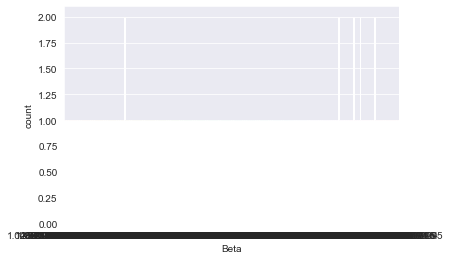

In [207]:
sns.countplot(x = 'Beta', data=data)

In [208]:
X = data.drop(['Beta'], axis=1)
y = data['Beta']

In [209]:
y

22rv1      0.000056
42mgba    24.090000
5637       9.217000
647v      61.350000
769p      17.360000
            ...    
yd8       22.740000
yh13      27.590000
ykg1      33.280000
zr751      0.001010
zr7530     0.000248
Name: Beta, Length: 494, dtype: float64

In [210]:
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.05, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.05, random_state=21)

In [211]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [212]:
def get_class_distribution(obj):
    count_dict = {
        "rating_3": 0,
        "rating_4": 0,
        "rating_5": 0,
        "rating_6": 0,
        "rating_7": 0,
        "rating_8": 0,
    }

    for i in obj:
        if i == 3:
            count_dict['rating_3'] += 1
        elif i == 4:
            count_dict['rating_4'] += 1
        elif i == 5:
            count_dict['rating_5'] += 1
        elif i == 6:
            count_dict['rating_6'] += 1
        elif i == 7:
            count_dict['rating_7'] += 1
        elif i == 8:
            count_dict['rating_8'] += 1
        else:
            print("Check classes.")

    return count_dict

Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check clas

Text(0.5, 1.0, 'Class Distribution in Test Set')

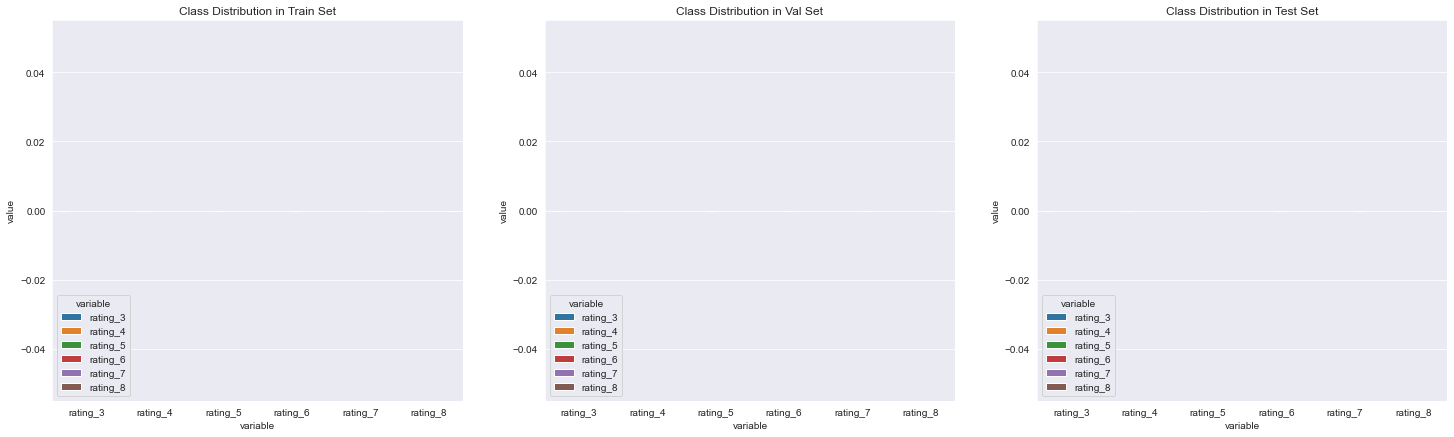

In [213]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Val
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

In [214]:
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)

In [215]:
class RegressionDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [216]:
EPOCHS = 500
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)

In [217]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [218]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()

        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)

        self.relu = nn.ReLU()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return(x)
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

In [219]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [220]:
model = MultipleRegression(NUM_FEATURES)
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

MultipleRegression(
  (layer_1): Linear(in_features=18523, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [221]:
loss_stats = {
    'train': [],
    "val": []
}

In [222]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):

    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()

        y_train_pred = model(X_train_batch)

        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()


    # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0

        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))

            val_epoch_loss += val_loss.item()
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))

    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 223.43280 | Val Loss: 295.95550
Epoch 002: | Train Loss: 192.43515 | Val Loss: 249.67444
Epoch 003: | Train Loss: 162.26658 | Val Loss: 219.45023
Epoch 004: | Train Loss: 161.47997 | Val Loss: 219.38200
Epoch 005: | Train Loss: 160.19960 | Val Loss: 220.98627
Epoch 006: | Train Loss: 155.97491 | Val Loss: 222.77445
Epoch 007: | Train Loss: 155.94502 | Val Loss: 220.22407
Epoch 008: | Train Loss: 154.55426 | Val Loss: 217.85213
Epoch 009: | Train Loss: 154.86693 | Val Loss: 216.58982
Epoch 010: | Train Loss: 153.69367 | Val Loss: 217.89260
Epoch 011: | Train Loss: 153.84488 | Val Loss: 218.18287
Epoch 012: | Train Loss: 152.59468 | Val Loss: 215.29634
Epoch 013: | Train Loss: 152.30231 | Val Loss: 214.26173
Epoch 014: | Train Loss: 151.46499 | Val Loss: 213.33668
Epoch 015: | Train Loss: 151.68115 | Val Loss: 215.26167
Epoch 016: | Train Loss: 150.15594 | Val Loss: 212.20663
Epoch 017: | Train Loss: 148.88654 | Val Loss: 209.35574
Epoch 018: | Train Loss: 147.43

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

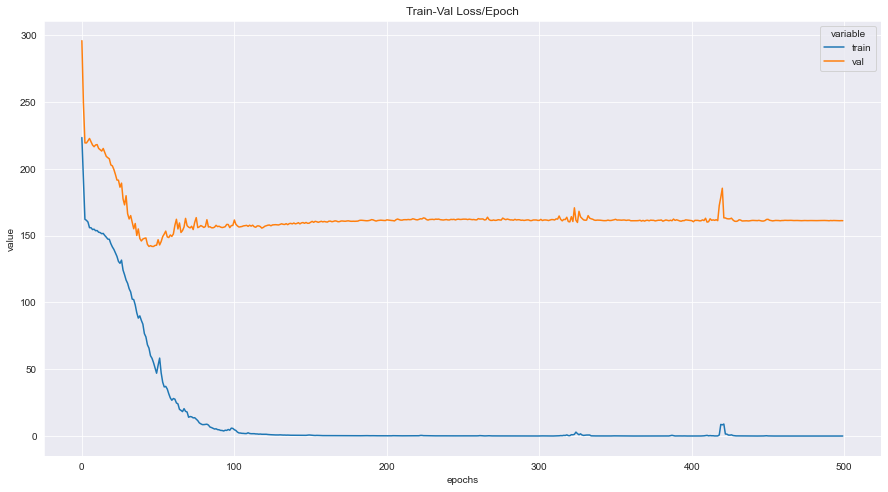

In [223]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [224]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = y_test_pred/multiplier
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [225]:
print(X_batch.tolist()[0])
y_pred_df = pd.DataFrame(y_pred_list, columns=['y_pred'])
y_pred_df.to_csv('data/y_pred_df.csv', index=False)

[0.8127447962760925, 0.15108394622802734, 0.4454132318496704, 0.061945997178554535, 0.060495976358652115, 0.02666618674993515, 0.5953060984611511, 0.2549763321876526, 0.5099444389343262, 0.07590974122285843, 0.05506103113293648, 0.4880903959274292, 0.8265732526779175, 0.9151790738105774, 0.6309618353843689, 0.11344721913337708, 0.6428331732749939, 0.04103691130876541, 0.605485200881958, 0.16660287976264954, 0.4025549590587616, -0.006983395200222731, 0.6687647104263306, 0.24733933806419373, 0.12722431123256683, 0.8167166113853455, 0.39963269233703613, 0.15150681138038635, 0.36046504974365234, 0.6168022155761719, 0.8503831028938293, 0.2962043285369873, 0.8172658085823059, 0.2854726314544678, 0.8424714803695679, 0.48240429162979126, 0.1669500768184662, 0.4055083096027374, 0.26318541169166565, 0.40473759174346924, 0.5537843108177185, 0.04548001289367676, 0.030435074120759964, 0.23168419301509857, 0.02953915111720562, 0.3745589852333069, 0.6784213185310364, 0.08002685755491257, 0.1366060823

In [226]:
print(y_test)
print(y_test/multiplier)

[5.625e-05 8.791e-05 2.162e+01 2.918e+01 2.338e+01 1.091e-04 2.256e+01
 5.761e-04 5.587e-05 8.347e-05 6.226e+00 4.671e-04 2.588e-01 2.187e-06
 1.198e-04 7.671e-05 2.480e-04 1.934e-04 2.147e+01 1.909e+01 4.344e+01
 3.051e-04 2.408e+00 5.134e-05 7.265e-06]
[5.625e-08 8.791e-08 2.162e-02 2.918e-02 2.338e-02 1.091e-07 2.256e-02
 5.761e-07 5.587e-08 8.347e-08 6.226e-03 4.671e-07 2.588e-04 2.187e-09
 1.198e-07 7.671e-08 2.480e-07 1.934e-07 2.147e-02 1.909e-02 4.344e-02
 3.051e-07 2.408e-03 5.134e-08 7.265e-09]


In [227]:
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test/multiplier, y_pred_list)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

Mean Squared Error : 205.06325038036783
R^2 : 0.22973042215532757
